# Portal Region Description

The goal of this step is to load the Sox9+ segmentation, classify the Sox9+ detected structures and then relate them to the portal region nearby. All this information should be saved into an excel file.

In [1]:
from pathlib import Path
import napari

from gulliver.io import (
    get_image,
    get_labels_from_zarr,
    get_channel_from_zarr,
    get_scale_from_zarr,
)
from gulliver.quantify import get_portal_region_description, find_portal_regions

c:\Users\agucor\Anaconda3\envs\bile_duct_clf\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
DATA_DIR = Path("../data/N1 B9-2 10x.zarr")

image = get_image(DATA_DIR, 0)

zarr image already exists


In [3]:
x_scale = get_scale_from_zarr(image)["x"]

In [4]:
sox9_channel = get_channel_from_zarr(image, "Sox9")
sox9_positive = get_labels_from_zarr(image, "sox9_positive")
portal_veins = get_labels_from_zarr(image, "portal_veins")

First we will expand the portal veins to cover the portal region. If at least a single pixel of the Sox9 structure is included in the region, it will be counted as belonging to that region.

In [5]:
portal_regions = find_portal_regions(portal_veins[:], 50)

13-Mar-24 16:20:22 - bfio.backends - WARNING  - Java backend is not available. This could be due to a missing dependency (jpype).


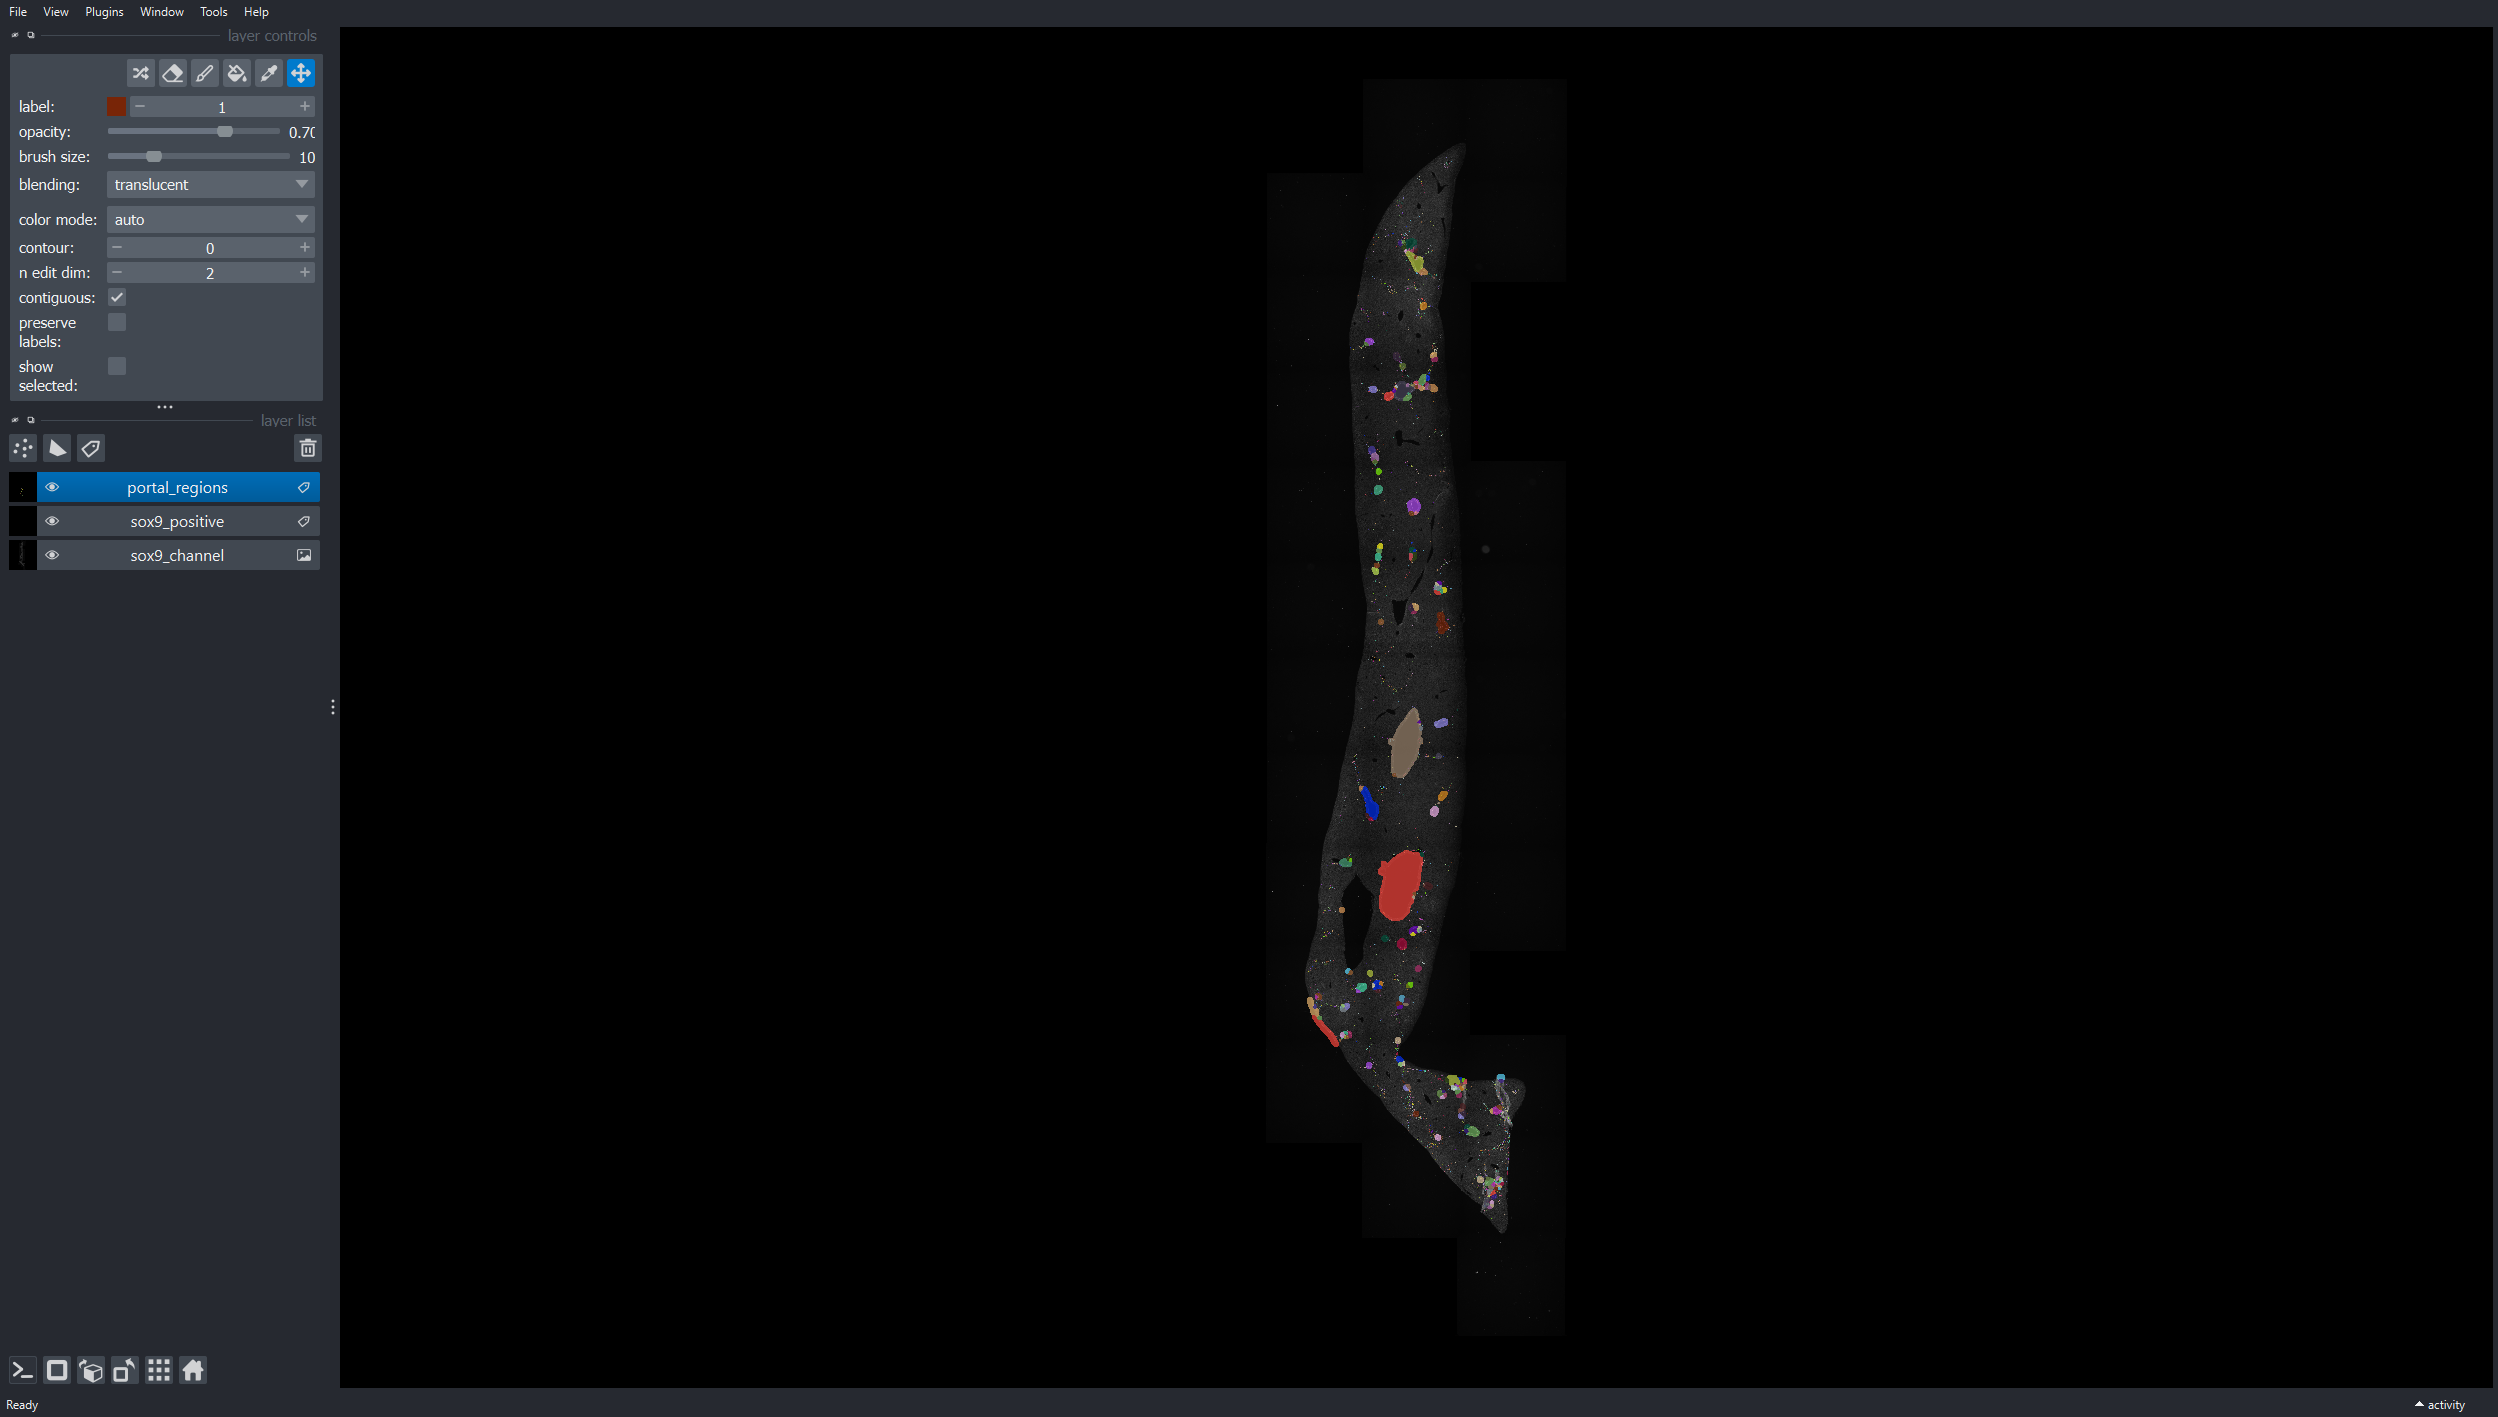

In [6]:
viewer = napari.Viewer()

viewer.add_image(sox9_channel, contrast_limits=(0, 2**16))
viewer.add_labels(sox9_positive)
viewer.add_labels(portal_regions)
napari.utils.nbscreenshot(viewer)

# Make tables to describe the region

The goal is to get information describing the Sox9 structures found, classify them and finally generate a table with that information.

In [7]:
properties = get_portal_region_description(
    sox9_positive=sox9_positive,
    lumen=get_labels_from_zarr(image, "lumen")[:],
    portal_veins=portal_veins[:],
    scale=x_scale,
)
properties

,area,class,portal_vein
label,,,
5063,31.2650,Single Cell,639.0
5045,63.7975,Single Cell,639.0
5051,136.0450,Cluster,639.0
5050,80.6975,Single Cell,639.0
5030,730.5025,Functional,639.0
...,...,...,...
1852,28.3075,Single Cell,0.0
1853,23.2375,Single Cell,0.0
1854,38.8700,Single Cell,0.0
